In [ ]:
import json
train_coco = None
val_coco = None
test_coco = None
train_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_train.json"
val_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_val.json"
test_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_test.json"
with open(train_json, "r") as f:
    train_coco = json.load(f)

with open(val_json, "r") as f:
    val_coco = json.load(f)
    
with open(test_json, "r") as f:
    test_coco = json.load(f)
    
all_coco = [train_coco, val_coco, test_coco]
ds_names = ["train", "validate", "test"]

print(train_coco.keys(), val_coco.keys(), test_coco.keys())
print(train_coco["categories"], val_coco["categories"], test_coco["categories"])

# print all keys used in annotations as a set
all_keys = set()
for ds in all_coco:
    for img in ds["images"]:
        all_keys.update(img.keys())
print(all_keys)

all_img_ids = []
for ds in all_coco:
    all_img_ids.extend([img["id"] for img in ds["images"]])

print(len(all_img_ids), len(set(all_img_ids)))

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
[{'id': 0, 'name': 'boat', 'supercategory': None}] [{'id': 0, 'name': 'boat', 'supercategory': None}] [{'id': 0, 'name': 'boat', 'supercategory': None}]
{'height', 'focal_length', 'coco_url', 'camera_model', 'file_name', 'width', 'beaufort', 'altitude', 'license', 'id'}
6872 6872


{1: 860, 4: 1962, 3: 2354, 5: 602, 6: 474, 0: 254, 2: 366}


Text(0.5, 1.0, 'Beaufort Distribution in SW Dataset')

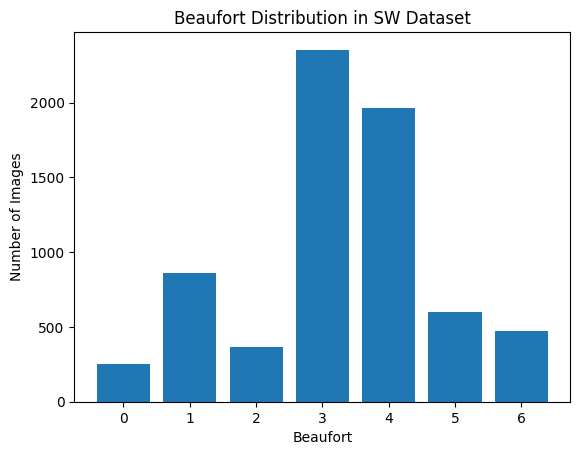

In [ ]:
# beaufort analysis, count number of images with each beaufort value
beaufort_counts = {}
for coco in all_coco:
    for img in coco["images"]:
        beaufort = img["beaufort"]
        if beaufort not in beaufort_counts:
            beaufort_counts[beaufort] = 0
        beaufort_counts[beaufort] += 1
        
print(beaufort_counts)
# visualize as bar plit
import matplotlib.pyplot as plt
plt.bar(beaufort_counts.keys(), beaufort_counts.values())
plt.xlabel("Beaufort")
plt.ylabel("Number of Images")
plt.title("Beaufort Distribution in SW Dataset")


Average tiny size:  195.6388946709682


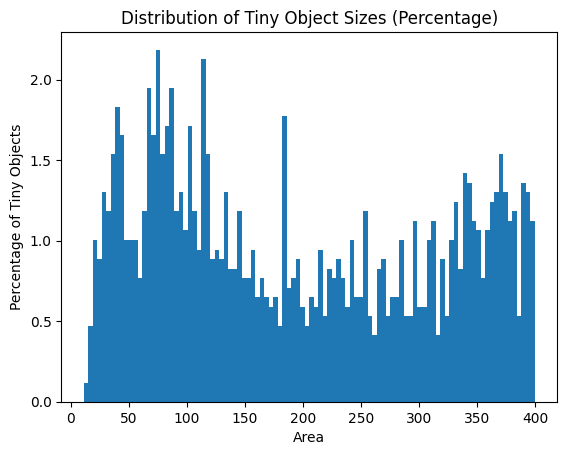

{'small': 1554, 'tiny': 1693, 'medium': 1745, 'large': 1008}
total number of annotations:  6000


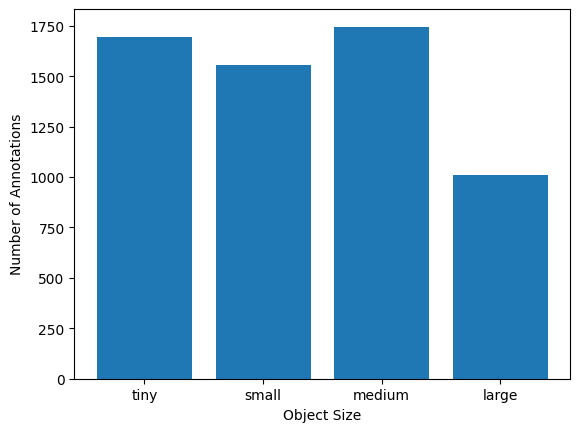

In [ ]:
# general object sizes analysis
import numpy as np
def get_size_name(area):
    if area < 20*20:
        return "tiny"
    if area < 32*32:
        return "small"
    if area < 96*96:
        return "medium"
    else:
        return "large"
    
def compute_area(bbox):
    return bbox[2]*bbox[3]

size_counts = {}
tiny_sizes = []
for coco in all_coco:
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name == "tiny":
            tiny_sizes.append(compute_area(ann["bbox"]))
        if size_name not in size_counts:
            size_counts[size_name] = 0
        size_counts[size_name] += 1

print("Average tiny size: ", sum(tiny_sizes)/len(tiny_sizes))

# Compute the total number of tiny objects
total_tiny_objects = len(tiny_sizes)

# Compute the histogram of tiny sizes
hist, bins = np.histogram(tiny_sizes, bins=100)

# Convert counts to percentages
hist_percentage = hist / total_tiny_objects * 100

import matplotlib.pyplot as plt

plt.hist(tiny_sizes, bins=100, weights=np.ones(len(tiny_sizes)) / total_tiny_objects * 100)
plt.xlabel("Area")
plt.ylabel("Percentage of Tiny Objects")
plt.title("Distribution of Tiny Object Sizes (Percentage)")
plt.show()

print(size_counts)
print("total number of annotations: ", sum(size_counts.values()))
# sort the size counts from tiny small medium large
size_counts = dict(sorted(size_counts.items()))
# reverse 
size_counts = dict(reversed(list(size_counts.items())))

# create a visiualization of the distribution of object sizes
import matplotlib.pyplot as plt
import numpy as np
# add labels to x and y axis
plt.xlabel("Object Size")
plt.ylabel("Number of Annotations")
# create a bar chart
plt.bar(size_counts.keys(), size_counts.values())
# display the plot
plt.show()

{'0-100': 207, '100-200': 612, '200-300': 785, '300-400': 291, '400-500': 3193, '500-600': 407, '600-700': 505}
total number of annotations:  6000


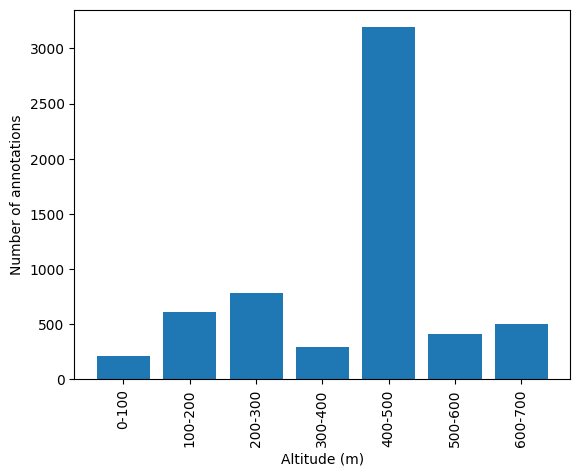

In [ ]:
# objects per altitudes in bins of 1000


altitude_counts = {}
for coco in all_coco:
    img_alt = {img["id"]: img["altitude"] for img in coco["images"]}
    for ann in coco["annotations"]:
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        if altitude_bin not in altitude_counts:
            altitude_counts[altitude_bin] = 0
        altitude_counts[altitude_bin] += 1
       
altitude_counts = dict(sorted(altitude_counts.items())) 
altitude_counts = {f"{int(k-1)*100}-{int(k)*100}": v for k, v in altitude_counts.items()}
print(altitude_counts)
print("total number of annotations: ", sum(altitude_counts.values()))

# create a visualization of the altitude counts
import matplotlib.pyplot as plt
# add labels for the axis
plt.xlabel("Altitude (m)")
plt.ylabel("Number of annotations")
plt.bar(altitude_counts.keys(), altitude_counts.values())
plt.xticks(rotation=90)
plt.show()

{'0-100': {'medium': 96, 'large': 95, 'small': 9, 'tiny': 7}, '100-200': {'tiny': 51, 'medium': 283, 'large': 215, 'small': 63}, '200-300': {'medium': 453, 'large': 187, 'small': 63, 'tiny': 82}, '300-400': {'medium': 97, 'large': 124, 'small': 33, 'tiny': 37}, '400-500': {'small': 1179, 'tiny': 1028, 'medium': 653, 'large': 333}, '500-600': {'medium': 114, 'small': 169, 'tiny': 123, 'large': 1}, '600-700': {'tiny': 365, 'large': 53, 'small': 38, 'medium': 49}}
{'0-100': {'tiny': 0.033816425120772944, 'small': 0.043478260869565216, 'medium': 0.463768115942029, 'large': 0.45893719806763283}, '100-200': {'tiny': 0.08333333333333333, 'small': 0.10294117647058823, 'medium': 0.4624183006535948, 'large': 0.35130718954248363}, '200-300': {'tiny': 0.10445859872611465, 'small': 0.08025477707006369, 'medium': 0.5770700636942675, 'large': 0.23821656050955414}, '300-400': {'tiny': 0.12714776632302405, 'small': 0.1134020618556701, 'medium': 0.3333333333333333, 'large': 0.4261168384879725}, '400-500

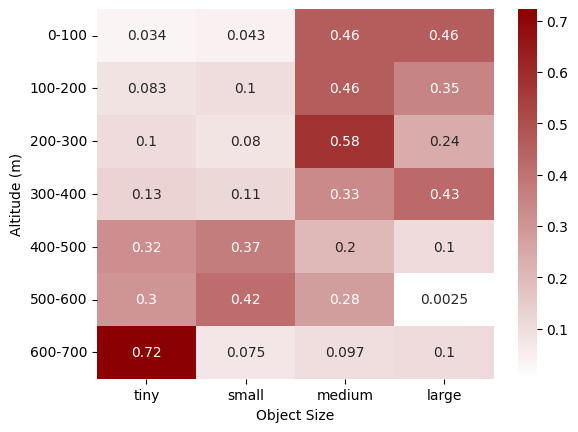

In [ ]:
# object sizes per altitude
# heatmap of object sizes (tiny, small, medium, large) per altitude bin of 100m

altitude_size_counts = {}
for coco in all_coco:
    img_alt = {img["id"]: img["altitude"] for img in coco["images"]}
    for ann in coco["annotations"]:
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        size_name = get_size_name(compute_area(ann["bbox"]))
        if altitude_bin not in altitude_size_counts:
            altitude_size_counts[altitude_bin] = {}
        if size_name not in altitude_size_counts[altitude_bin]:
            altitude_size_counts[altitude_bin][size_name] = 0
        altitude_size_counts[altitude_bin][size_name] += 1

altitude_size_counts = dict(sorted(altitude_size_counts.items()))
altitude_size_counts = {f"{int(k-1)*100}-{int(k)*100}": v for k, v in altitude_size_counts.items()}
print(altitude_size_counts)

altitude_size_counts_percent = {}
for k, v in altitude_size_counts.items():
    total = sum(v.values())
    altitude_size_counts_percent[k] = {size: count/total for size, count in v.items()}

# sort tiny, small, medium, large in this order
altitude_size_counts_percent = {k: {size: altitude_size_counts_percent[k][size] for size in ["tiny", "small", "medium", "large"]} for k in altitude_size_counts_percent.keys()}
print(altitude_size_counts_percent)

# visual heatmap from these values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(altitude_size_counts_percent).T
# the larger the number, the more red the color of the field
from matplotlib.colors import LinearSegmentedColormap



cmap = LinearSegmentedColormap.from_list('custom_red', ['white', 'darkred'], N=256)

sns.heatmap(df, annot=True, cmap=cmap)
plt.xlabel("Object Size")
plt.ylabel("Altitude (m)")
plt.show()

{'train': {'small': 1085, 'tiny': 1211, 'medium': 1191, 'large': 688}, 'validate': {'medium': 263, 'large': 155, 'tiny': 228, 'small': 240}, 'test': {'large': 165, 'medium': 291, 'small': 229, 'tiny': 254}}
{'train': {'small': 0.25988023952095807, 'tiny': 0.29005988023952095, 'medium': 0.2852694610778443, 'large': 0.16479041916167664}, 'validate': {'medium': 0.29683972911963885, 'large': 0.17494356659142213, 'tiny': 0.25733634311512416, 'small': 0.2708803611738149}, 'test': {'large': 0.1757188498402556, 'medium': 0.30990415335463256, 'small': 0.24387646432374868, 'tiny': 0.27050053248136313}}
{'train': {'0-100': 138, '100-200': 403, '200-300': 570, '300-400': 183, '400-500': 2241, '500-600': 285, '600-700': 355}, 'validate': {'0-100': 30, '100-200': 95, '200-300': 124, '300-400': 40, '400-500': 456, '500-600': 66, '600-700': 75}, 'test': {'0-100': 39, '100-200': 114, '200-300': 91, '300-400': 68, '400-500': 496, '500-600': 56, '600-700': 75}}
{'train': {'0-100': 0.03305389221556886, '1

<Axes: >

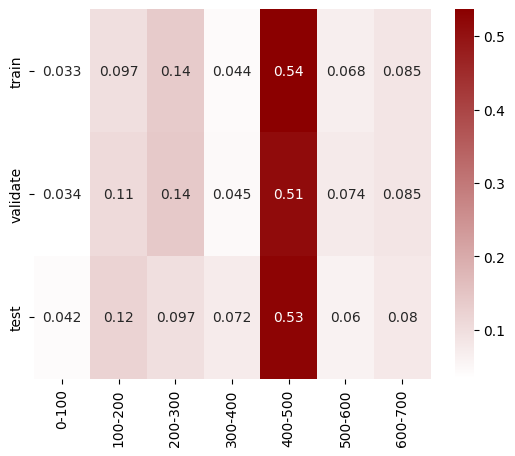

In [ ]:
# distribution of object sizes  in trian/val/test seperately

size_counts = {}
for coco, ds_name in zip(all_coco, ds_names):
    size_counts[ds_name] = {}
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name not in size_counts[ds_name]:
            size_counts[ds_name][size_name] = 0
        size_counts[ds_name][size_name] += 1

print(size_counts)
size_counts_percent = {}
for k, v in size_counts.items():
    total = sum(v.values())
    size_counts_percent[k] = {size: count/total for size, count in v.items()}
        
print(size_counts_percent)

altitude_counts = {}
for coco, ds_name in zip(all_coco, ds_names):
    altitude_counts[ds_name] = {}
    img_alt = {img["id"]: img["altitude"] for img in coco["images"]}
    for ann in coco["annotations"]:
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        if altitude_bin not in altitude_counts[ds_name]:
            altitude_counts[ds_name][altitude_bin] = 0
        altitude_counts[ds_name][altitude_bin] += 1

altitude_counts = {k: dict(sorted(v.items())) for k, v in altitude_counts.items()}
altitude_counts = {k: {f"{int(k-1)*100}-{int(k)*100}": v for k, v in altitude_counts[k].items()} for k in altitude_counts.keys()}
print(altitude_counts)
altitude_counts_percent = {}
for k, v in altitude_counts.items():
    total = sum(v.values())
    altitude_counts_percent[k] = {size: count/total for size, count in v.items()}
print(altitude_counts_percent)

# visualize altitude and size percentages per set
df = pd.DataFrame(altitude_counts_percent).T
sns.heatmap(df, annot=True, cmap=cmap)




<Axes: >

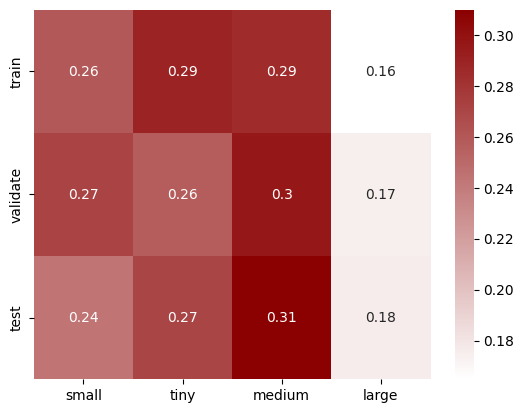

In [ ]:
df2 = pd.DataFrame(size_counts_percent).T
sns.heatmap(df2, annot=True, cmap=cmap)

In [ ]:
# image count in each set
image_counts = {ds_name: len(coco["images"]) for coco, ds_name in zip(all_coco, ds_names)}
print(image_counts)

# image counts with and without objects per set
image_counts_with_objects = {ds_name: len(set([ann["image_id"] for ann in coco["annotations"]])) for coco, ds_name in zip(all_coco, ds_names)}
print(image_counts_with_objects)
image_counts_without_objects = {ds_name: image_counts[ds_name] - image_counts_with_objects[ds_name] for ds_name in image_counts.keys()}
print(image_counts_without_objects)

# Object counts per set
object_counts = {ds_name: len(coco["annotations"]) for coco, ds_name in zip(all_coco, ds_names)}
print(object_counts)

# average beaufort value per set
beaufort_sums = {ds_name: sum([img["beaufort"] for img in coco["images"]]) for coco, ds_name in zip(all_coco, ds_names)}
beaufort_avg = {ds_name: beaufort_sums[ds_name] / image_counts[ds_name] for ds_name in beaufort_sums.keys()}
print(beaufort_avg)

{'train': 3634, 'validate': 1619, 'test': 1619}
{'train': 3176, 'validate': 703, 'test': 703}
{'train': 458, 'validate': 916, 'test': 916}
{'train': 4175, 'validate': 886, 'test': 939}
{'train': 3.3464501926252064, 'validate': 3.1513279802347127, 'test': 3.1457689932056825}
